In [1]:
import numpy as np,pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.shape
print(dataset.describe())
print(dataset.info())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loa

## For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not

In [4]:
print(dataset['Property_Area'].value_counts())
print(dataset['Credit_History'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


# Visualization

In [5]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Continuous Variable Analysis

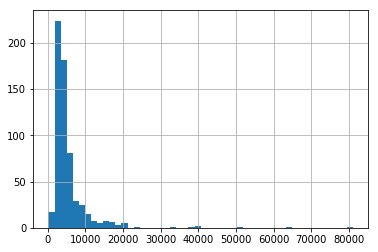

In [6]:
#dataset.plot(kind='box',figsize=(10,10))
dataset['ApplicantIncome'].hist(bins=50)

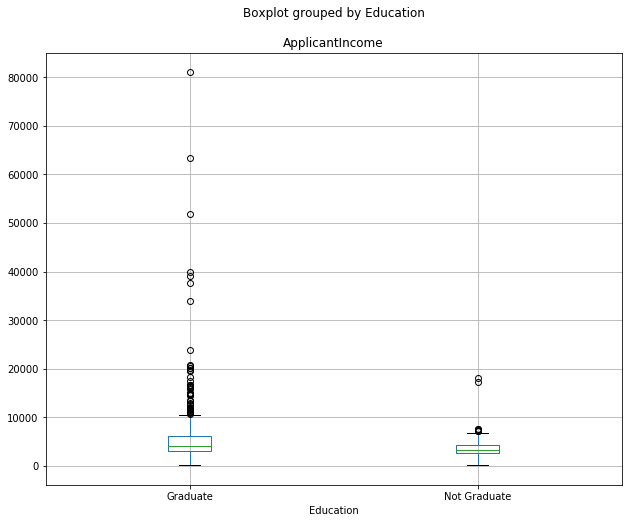

In [7]:
dataset.boxplot(column='ApplicantIncome',by='Education',figsize=(10,8))

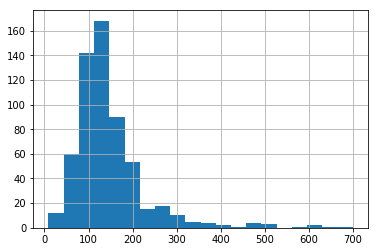

In [8]:
dataset['LoanAmount'].hist(bins=20)

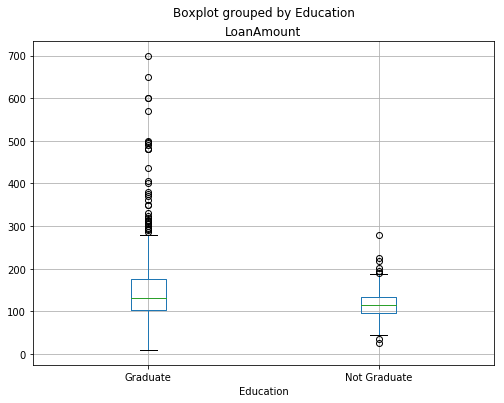

In [9]:
dataset.boxplot(column='LoanAmount',by='Education',figsize=(8,6))

# Categorical variable analysis

In [10]:
temp1 = dataset['Credit_History'].value_counts(ascending=True)
temp2 = dataset['Loan_Status'].value_counts(ascending=True)
temp2 = dataset.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

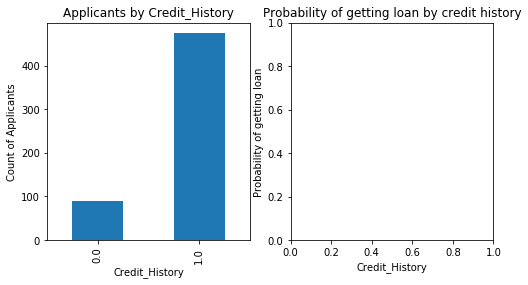

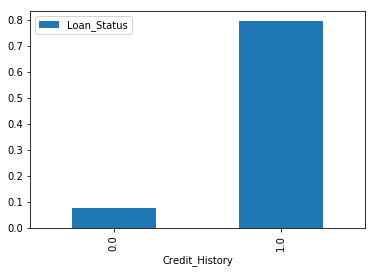

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


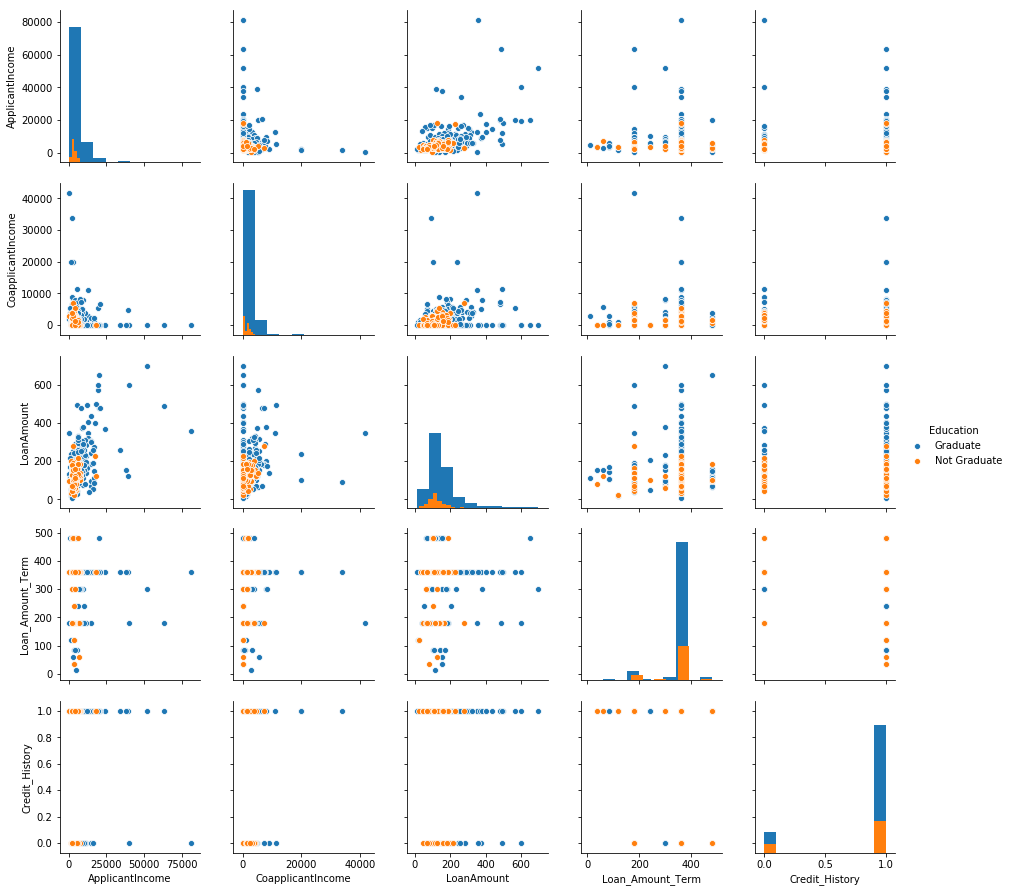

In [12]:
sns.pairplot(dataset,hue='Education',diag_kind='hist')

# Data Mungging

In [13]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)
#dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

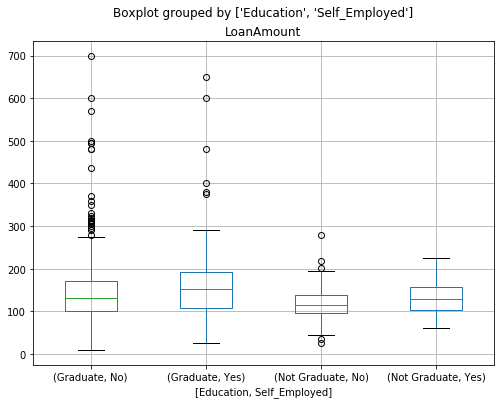

In [15]:
dataset.boxplot(column='LoanAmount',by=['Education','Self_Employed'],figsize=(8,6))

In [16]:
dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
dataset['Self_Employed'].fillna('No',inplace=True)

In [18]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
dataset['Gender'].fillna('Male',inplace=True)

In [20]:
dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
dataset['Married'].fillna('Yes',inplace=True)

In [22]:
dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

## Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

In [24]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

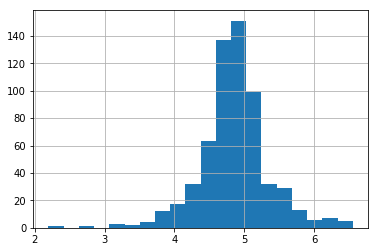

In [25]:
dataset['LoanAmount_log'].hist(bins=20)

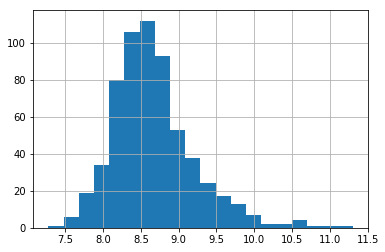

In [26]:
dataset['TotalIncome'] = dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [27]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

### Data Cleaning Completed

## Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories

In [28]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
#dataset.dtypes

In [29]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold
from sklearn import metrics 

# Generic function for making a classification model and accessing performance:

In [237]:
def classification_model(model,dataset,features,labels):
    model.fit(dataset[features],dataset[labels])
    predictions=model.predict(dataset[features])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,dataset[labels])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5,random_state=42)
    errors = []
    for train,test in kf.split(dataset[features]):
        # Filter training data
        print('train0--',train.shape)
        print('test--',test.shape)
        train_features = (dataset[features].iloc[train,:])
        print('train_features---',train_features.shape)
        # The target we're using to train the algorithm.
        train_labels = dataset[labels].iloc[train]
        print('train_labels---',train_labels.shape)
        # Training the algorithm using the predictors and target.
        model.fit(train_features, train_labels)

        #Record error from each cross-validation run
        errors.append(model.score(dataset[features].iloc[test,:], dataset[labels].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(errors)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(dataset[features],dataset[labels]) 

In [238]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
outcome_var = 'Loan_Status'
classification_model(model, dataset,predictor_var,outcome_var)

Accuracy : 80.945%
train0-- (491,)
test-- (123,)
train_features--- (491, 4)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 4)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 4)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 4)
train_labels--- (491,)
train0-- (492,)
test-- (122,)
train_features--- (492, 4)
train_labels--- (492,)
Cross-Validation Score : 80.946%


In [239]:
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, dataset,predictor_var,outcome_var)

Accuracy : 80.945%
train0-- (491,)
test-- (123,)
train_features--- (491, 1)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 1)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 1)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 1)
train_labels--- (491,)
train0-- (492,)
test-- (122,)
train_features--- (492, 1)
train_labels--- (492,)
Cross-Validation Score : 80.946%


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

In [240]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, dataset,predictor_var,outcome_var)

Accuracy : 100.000%
train0-- (491,)
test-- (123,)
train_features--- (491, 10)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 10)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 10)
train_labels--- (491,)
train0-- (491,)
test-- (123,)
train_features--- (491, 10)
train_labels--- (491,)
train0-- (492,)
test-- (122,)
train_features--- (492, 10)
train_labels--- (492,)
Cross-Validation Score : 77.365%
